In [ ]:
# Step 5
# In this notebook, we find out which score is the minimum score we can trust more or less.
# For that, we will explore the data sets and look at data properties that tell us about the reliability.
# This follows no scientific guideline and is based mostly on my judgement. Judge for yourself.

In [1]:
# >>> Preparation
import pandas

print("Importing cleaned names for improvement... ")
names = pandas.read_csv("../_data/names_cat_i2.csv", usecols=["name", "n_publs", "likely_gender", "score", "first_name", "last_name"])
print("Names imported.")

Importing cleaned names for improvement... 
Names imported.


In [2]:
# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print(names[:10])

                                        name     first_name  last_name  \
name                                                                     
'Maseka Lesaoana            'Maseka Lesaoana            NaN        NaN   
(David) Jing Dai            (David) Jing Dai            NaN        NaN   
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng  Max Zong-Ming      Cheng   
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen            NaN        NaN   
(Zhou) Bryan Bai            (Zhou) Bryan Bai            NaN        NaN   
A Clara Kanmani              A Clara Kanmani          Clara    Kanmani   
A Lun                                  A Lun            NaN        Lun   
A Min Tjoa                        A Min Tjoa            Min       Tjoa   
A S Akshaya                      A S Akshaya        Akshaya        NaN   
A'ang Subiyakto              A'ang Subiyakto          A'ang  Subiyakto   

                      likely_gender  n_publs  score  
name                                                 
'Ma

In [3]:
# >> The last name was identified, but not the first name
d = names[pandas.isnull(names['first_name']) & pandas.notnull(names['last_name'])]
# If the last name was not identified but the first name was, most names have a score of max. 4. They are 16 851 names
# and contain many false positives on first view. Eg. A. A. S. Mohamed 	first name =  Mohamed 	 which is probably false
# Harshly said, this means that a score of 4 means a certainty of 0.
# If 4 has a certainty of 0, can we trust a score of 5? Let's find out in the next step.

In [5]:
d.describe()

,n_publs,score
count,153461.000000,153461.000000
mean,1.891829,1.821473
std,4.898013,1.136804
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,362.000000,4.000000


In [6]:
# >> Can we trust a score of 5?
e = names[names['score'] == 5]
# names of a score of 5 are problematic. Some are abbreviated, some are not.
# This concerns 299 615 names.
# Those that are not abbreviated seem to be classified fine (manual check on about 100 names).
# But are those that are abbreviated? Let's see in the next step

In [8]:
e.describe()

,n_publs,score
count,299615.000000,299615.0
mean,5.704537,5.0
std,17.244241,0.0
min,1.000000,5.0
25%,1.000000,5.0
50%,2.000000,5.0
75%,4.000000,5.0
max,1032.000000,5.0


In [259]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['font.size'] = 11.0

In [260]:
# Get those names that contain an abbreviation
# They mostly have score 2
f = names[names['name'].str.match('\w\.')]

In [261]:
f.describe()

,n_publs,score
count,198591.000000,198591.000000
mean,2.251079,2.173618
std,8.352779,1.706601
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,1694.000000,17.000000


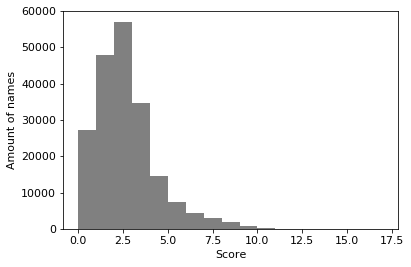

In [262]:
plt.hist(f["score"], bins=f["score"].max(), color="grey")
plt.xlabel("Score")
plt.ylabel("Amount of names")
plt.savefig('../_graphs/score/abbreviated_names.pdf')
plt.savefig('../_graphs/score/abbreviated_names.pgf')

In [94]:
# 10 213 abbreviated names have a score > 5
h = f[f['score']>5]

In [100]:
h.describe()

,n_publs,score
count,10213.000000,10213.000000
mean,4.852933,7.008225
std,23.528885,1.168497
min,1.000000,6.000000
25%,1.000000,6.000000
50%,1.000000,7.000000
75%,3.000000,8.000000
max,1694.000000,17.000000


In [ ]:
# Many abbreviations with russian last name are classified reliably, because 
# russian last names can tell the gender (unlike stated in Science Metrix: http://www.science-metrix.com/sites/default/files/science-metrix/publications/science-metrix_bibliometric_indicators_womens_contribution_to_science_report.pdf)
# https://en.wikipedia.org/wiki/List_of_surnames_in_Russia
# Other names have another not abbreviated name
r = f.filter(regex='(ov|sky|vich|ev)$', axis=0)

In [165]:
r.describe()

,n_publs,score
count,4401.000000,4401.000000
mean,1.501022,6.092252
std,1.593042,2.152512
min,1.000000,0.000000
25%,1.000000,5.000000
50%,1.000000,6.000000
75%,1.000000,8.000000
max,52.000000,13.000000


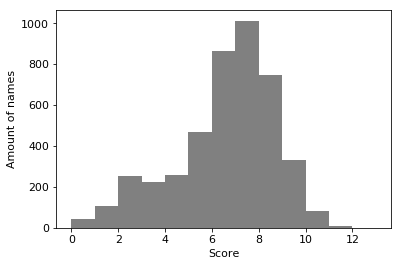

In [263]:
plt.hist(r["score"], bins=r["score"].max(), color="grey")

plt.xlabel("Score")
plt.ylabel("Amount of names")

plt.savefig('../_graphs/score/russian_abbreviated_names.pdf')
plt.savefig('../_graphs/score/russian_abbreviated_names.pgf')

In [137]:
# Asian names
# https://en.wikipedia.org/wiki/List_of_common_Chinese_surnames
a = names.filter(regex='(Zhang|Liu|Deng|Shen|Weng|Chen|Wang|Huang|Lu|Li|Yang|Zhao|Wu|Zhou|Xu|Sun|Ma|Zhu|Hu|Guo|He|Gao|Luo|Lin|Zheng|Liang|Chan|Tian|Dong|Yu|Wei)$', axis=0)

In [138]:
a.describe()

,n_publs,score
count,163930.000000,163930.000000
mean,8.898152,2.624895
std,30.770744,1.899293
min,1.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,6.000000,4.000000
max,1200.000000,18.000000


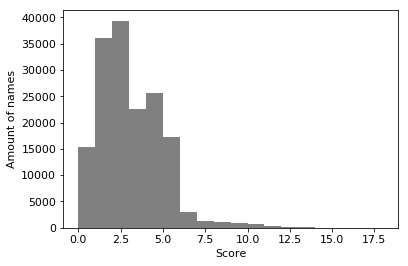

In [264]:
plt.hist(a["score"], bins=a["score"].max(), color="grey")

plt.xlabel("Score")
plt.ylabel("Amount of names")

plt.savefig('../_graphs/score/asian_names.pdf')
plt.savefig('../_graphs/score/asian_names.pgf')

In [248]:
# Some unisex names
n = names.filter(regex='^(Kim|Ashley|Anh)\s', axis=0) 

In [249]:
n.describe()

,n_publs,score
count,1494.000000,1494.000000
mean,4.228246,2.193440
std,13.123433,1.972194
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,3.000000
max,262.000000,12.000000


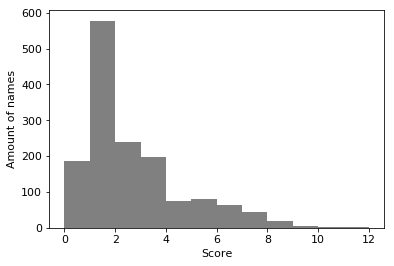

In [265]:
plt.hist(n["score"], bins=n["score"].max(), color="grey")

plt.xlabel("Score")
plt.ylabel("Amount of names")

plt.savefig('../_graphs/score/unisex_names.pdf')
plt.savefig('../_graphs/score/unisex_names.pgf')

In [35]:
# How many indirect abbreviations do we have? Do they bother the reliability of score 5
# 74, max score = 6 (2 names)
g = names[names['name'].str.match('\w\s')]
# Not relevant.

In [ ]:
# >>Interpretation 
# The minimum score that is reliable is estimated to be 5. 